In [1]:
import kwikfile as kf
import numpy as np
import imp
%matplotlib inline
import matplotlib.pyplot as plt
from klusta.kwik import KwikModel
import matplotlib as mpl
from pylab import *

class HeatMap:
    
    def __init__(self,kpath=None,name=None):
        if kpath is not None:
            self.kwik_model=KwikModel(kpath)
            self.kwikfile=kf.KwikFile(kpath)
            self.kpath=kpath
            self.name=self.kwikfile.name
            #print(self.kwikfile.list_of_groups())
    #média das amplitudes de cada site
    def shank_amplitude (self,group_name=None):
        
        
        if group_name is not None:
            if group_name is "mua" or group_name is "good" or group_name is "noise" or group_name is 'unsorted':
                #median_amplitude_group = np.zeros((10,32))
                median_amplitude_group=np.zeros((32,32)) #!!!!!
                #print(group_name)
                
                for cluster_id in self.kwikfile.clusters(group_name=group_name):
                    clusters = self.kwik_model.spike_clusters
                    idx=np.argwhere (clusters==cluster_id)
                    w=self.kwik_model.all_waveforms[idx]
                    num_channels = w.shape[2]
                    #print(cluster_id)
                    
                    for ch in range (0,num_channels):
                        median_amplitude_group[ch,:]+=np.mean(w[:,:,ch],0)
                #print(w[:,:,:])
                return median_amplitude_group
            else:
                print("Enter the group name valid!")
                return None
          
    #contorno
    '''
    def probe_geometry (self,num_channels=None):
        if num_channels is not None:
            eletrode_form = [11,6,1,0,0,0,1,6,11]
            return eletrode_form
        else:
            raise NameError("Probe geometry invalid!")
    '''
    #
    def amplitudes_heat_map (self, median_amplitude_group=None):
        fig,ax = plt.subplots(figsize=(6, 10))
        
        print(median_amplitude_group)
        max_amplitude=np.zeros((len(median_amplitude_group[:,0])))
        #máximo de cada canal
        for ch in range(0,len(median_amplitude_group[:,0])):
            top=max(median_amplitude_group[ch,:])
            low=min(median_amplitude_group[ch,:])
            if top>abs(low):
                max_amplitude[ch]=top
            else:
                max_amplitude[ch]=abs(low)
        #
        posx=np.flipud (self.kwik_model.channel_positions [:,0])
        posy=np.flipud (self.kwik_model.channel_positions [:,1])
        print(posx,posy)
        #mapa de cores
        cmap = mpl.cm.jet
        norm = mpl.colors.Normalize(vmin=min(max_amplitude), vmax=max(max_amplitude))
        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                extend='both',
                                extendfrac='auto',
                                spacing='uniform',
                                orientation='vertical')  
        
        #lista de posições dos círculos
        a=list()
        dx = 35
        for ch in range (0,len(median_amplitude_group[:,0])):
            if ch%2!=0:
                x_offset = posx[ch]+dx
            else:
                x_offset = posx[ch]-dx
            y_offset =posy[ch]*2
            circle = plt.Circle((x_offset,y_offset),10,color=cb1.to_rgba(max_amplitude[ch]))
            a.append(circle)
            
        #ax = plt.gca()
        ax.cla()   
        ax.set_xlim((min(posx)-dx-10, max(posx)+dx+10))
        ax.set_ylim((min(posy)*2-10, max(posy)*2+10))
        
        for i in range(0,len(median_amplitude_group[:,0])):
            c=a[i]
            ax.add_artist(c)
            
        data = np.clip(randn(0, 0), -1, 1)
        cax = ax.imshow(data, interpolation='None', cmap=cm.jet)
        cbar = fig.colorbar(cax,ticks=[0,0.5,1],orientation='vertical')
        cbar.ax.set_yticklabels(['Low','Medium','High'])
        plt.axis('off')
        
        plt.show()

In [2]:
#kpath='/home/harison/UFPE/data/phy-data-master/kwik/h.kwik'
kpath='/home/harison/UFPE/data/g01.kwik'
hm = HeatMap(kpath)


Created class on = /home/harison/UFPE/data/g01.kwik !


In [3]:
g = np.loadtxt('good.out')
m = np.loadtxt('mua.out')

GOOD

[[  9.91581627e+02   1.16075292e+03   1.32216994e+03   1.47353384e+03
    1.62128298e+03   1.75486685e+03   1.88223106e+03   2.04165451e+03
    2.26609802e+03   2.53441188e+03   2.67050964e+03   2.40317179e+03
    1.48484361e+03  -5.66764553e+01  -1.64914270e+03  -2.70919538e+03
   -3.18474122e+03  -3.23171332e+03  -3.01433521e+03  -2.62015460e+03
   -2.14176617e+03  -1.61659571e+03  -1.13321988e+03  -7.14939487e+02
   -3.74552256e+02  -7.95292458e+01   1.67844645e+02   3.69985627e+02
    5.32505628e+02   6.46883797e+02   7.11542607e+02   7.22406776e+02]
 [  1.01582317e+03   1.20123410e+03   1.38718786e+03   1.56312643e+03
    1.72391107e+03   1.87456381e+03   2.01015082e+03   2.14049868e+03
    2.29298835e+03   2.48947050e+03   2.60589450e+03   2.18532453e+03
    7.07506376e+02  -1.64227344e+03  -3.62546229e+03  -4.41061038e+03
   -4.27411175e+03  -3.66728929e+03  -2.92548613e+03  -2.21737861e+03
   -1.60873622e+03  -1.06794954e+03  -6.05628384e+02  -2.17540285e+02
    1.00365789e+02 

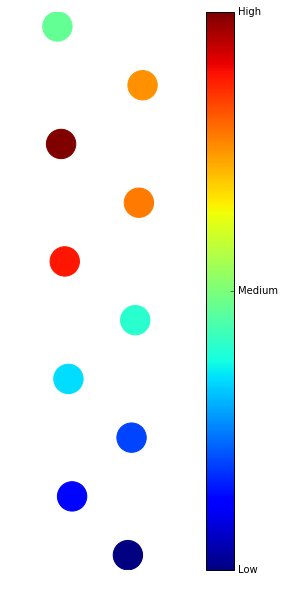

In [4]:

#g=hm.shank_amplitude('unsorted')
hm.amplitudes_heat_map(g)

MUA

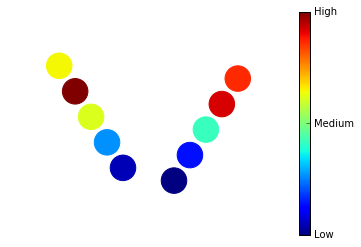

In [17]:
hm.amplitudes_heat_map(m)

In [3]:
good=hm.shank_amplitude("good")
np.savetxt('good.out', good) 

good
6
20
36
45
52
56
67
71
91
94
96
99
103
104
106
107
110
111
112
116
118
119
120
121
122


In [28]:
np.savetxt('good.out', good) 
a = np.loadtxt('test.out')

In [29]:
mua=hm.shank_amplitude("mua")

mua
4
5
14
15
22
24
27
31
32
38
41
47
51
57
58
60
66
70
72
84
85
89


In [30]:
np.savetxt('mua.out', mua)

In [4]:
good.shape

(10, 32)

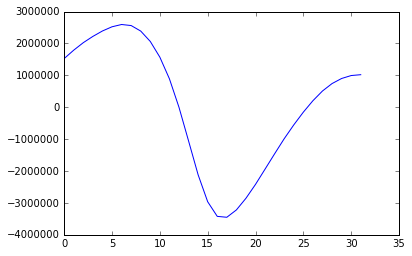

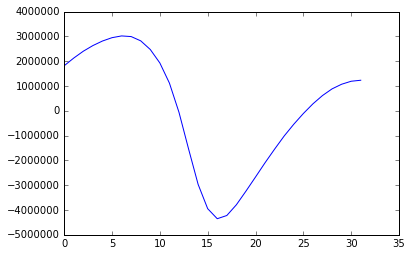

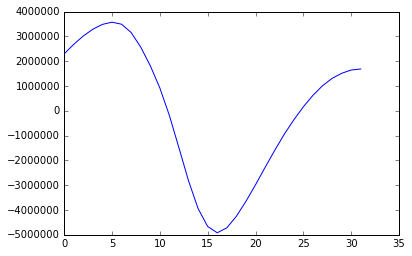

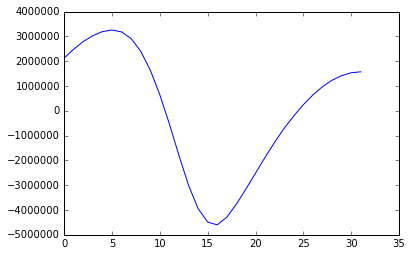

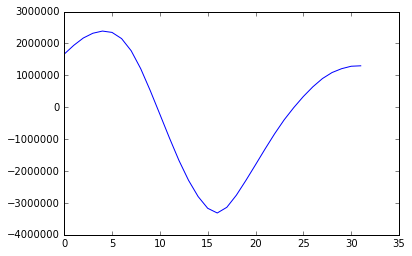

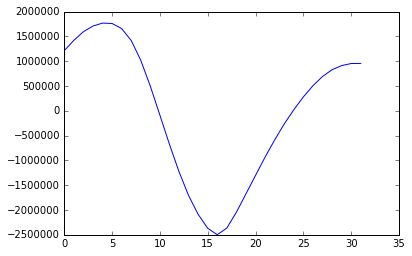

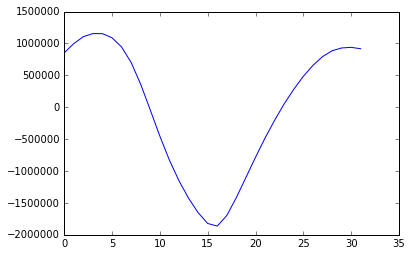

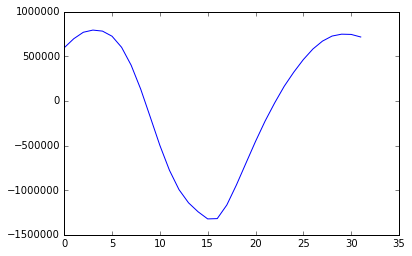

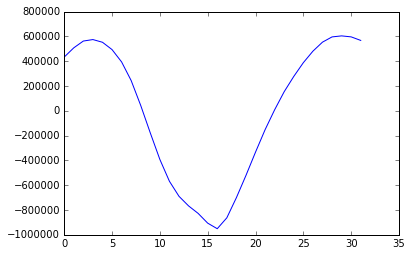

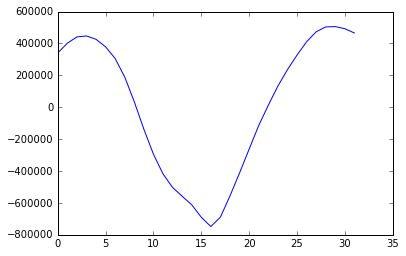

In [6]:
b=a
for ch in range(0,10):
    for i in range(0,len(a[ch,:])):
        b[ch,i]=a[ch,i]*1000
#print(b)
for ch in range(0,10):
    fig=plt.figure()
    plt.plot(a[ch,:])
    plt.show

NameError: name 'x' is not defined

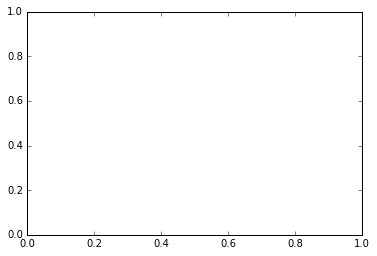

In [7]:
fig, ax = plt.subplots()
for i in range(0,10):
    circle = plt.Circle((x[i],y[i]),0.5,color=cb1.to_rgba(var[i]))
    a.append(circle)

In [59]:
fig=plt.figure()
plt.plot(a[:,:])

TypeError: 'NoneType' object is not subscriptable

In [26]:
x=[[1,2,4,5,6,7,8],[1,4,3,6,5,6,7]]
print(max(x))

[1, 4, 3, 6, 5, 6, 7]


In [44]:
x=[2,4,6]

In [52]:
y=[0,0,0]
for i in range (0,3):
    y[i]=x[i]/2
print(y)

[1.0, 2.0, 3.0]
